# MACHINE LEARNING ON TESLA INDIA MARKET DATA 

### IMPORT THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### LOAD THE DATASET

In [2]:
df_tesla_market_data = pd.read_csv('tesla_india_market_data.csv')

### DATA OVERVIEW

In [3]:
# show first 5 rows of the data set 
df_tesla_market_data.head()

,Customer_ID,Age,Income_Level,Location,Purchase_Intent,Price_Sensitivity,Charging_Access,Distance_to_Supercharger,Import_Duty_Impact,Local_Manufacturing_Support,Brand_Loyalty,Environmental_Concern,Tech_Savviness,Competitor_Price,Government_Incentive_Awareness
0,1,39,48.34,Hyderabad,0.334,0.472,NaN,55.73,0.522,1,Competitor,0.521,High,53.08,Medium
1,2,33,13.35,Mumbai,0.315,0.250,Home,100.60,0.966,1,Competitor,0.506,High,46.02,Low
2,3,41,17.33,Mumbai,0.285,0.201,NaN,53.72,0.578,1,Tesla,0.817,High,57.93,Low
3,4,50,13.90,Bangalore,0.228,0.108,NaN,98.21,0.535,0,Competitor,0.724,High,68.37,Medium
4,5,32,33.20,Delhi,0.360,0.229,Public,63.17,0.052,1,Neutral,0.704,Low,63.86,Medium


In [4]:
# show last 5 rows of the data set 
df_tesla_market_data.tail()

,Customer_ID,Age,Income_Level,Location,Purchase_Intent,Price_Sensitivity,Charging_Access,Distance_to_Supercharger,Import_Duty_Impact,Local_Manufacturing_Support,Brand_Loyalty,Environmental_Concern,Tech_Savviness,Competitor_Price,Government_Incentive_Awareness
12495,12496,29,15.32,Delhi,0.400,0.398,NaN,60.96,0.516,1,Competitor,0.552,Low,45.00,High
12496,12497,44,50.96,Gurugram,0.421,0.260,NaN,114.06,0.052,1,Competitor,0.804,Medium,58.96,Low
12497,12498,42,21.44,Hyderabad,0.197,0.442,Public,43.72,0.042,1,Neutral,0.508,Medium,61.21,Low
12498,12499,33,15.00,Chennai,0.359,0.254,Public,4.56,0.788,0,Competitor,0.477,Medium,60.58,Low
12499,12500,23,20.04,Pune,0.252,0.071,Home,65.81,0.878,0,Tesla,0.708,Medium,45.00,Medium


In [5]:
# show the shape of the data set 
df_tesla_market_data.shape

(12500, 15)

**INTERPRETATION**
 - there are 12500 rows/observations
 - there are 15 columns/attributes

In [6]:
df_tesla_market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_ID                     12500 non-null  int64  
 1   Age                             12500 non-null  int64  
 2   Income_Level                    12375 non-null  float64
 3   Location                        12500 non-null  object 
 4   Purchase_Intent                 12375 non-null  float64
 5   Price_Sensitivity               12500 non-null  float64
 6   Charging_Access                 6219 non-null   object 
 7   Distance_to_Supercharger        12375 non-null  float64
 8   Import_Duty_Impact              12500 non-null  float64
 9   Local_Manufacturing_Support     12500 non-null  int64  
 10  Brand_Loyalty                   12500 non-null  object 
 11  Environmental_Concern           12500 non-null  float64
 12  Tech_Savviness                  

**INTERPRETATION**
 - We have a total of 10 numerical columns and 5 categorical columns.
 - Memory usage is 1.4+ MB that means we do not require extra resources.

In [7]:
# justify the basic statstics of the data
df_tesla_market_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,12500.0,6250.500000,3608.583517,1.000,3125.750,6250.500,9375.250,12500.000
Age,12500.0,34.663280,9.537365,18.000,28.000,34.000,41.000,65.000
Income_Level,12375.0,40.394954,28.019956,10.000,18.990,33.660,54.250,273.890
Purchase_Intent,12375.0,0.374296,0.161821,0.006,0.252,0.363,0.484,0.917
Price_Sensitivity,12500.0,0.286112,0.158809,0.001,0.162,0.265,0.390,0.890
Distance_to_Supercharger,12375.0,30.129041,29.110154,0.000,8.590,21.210,42.260,150.000
Import_Duty_Impact,12500.0,0.494428,0.288909,0.000,0.241,0.495,0.746,1.000
Local_Manufacturing_Support,12500.0,0.650720,0.476762,0.000,0.000,1.000,1.000,1.000
Environmental_Concern,12500.0,0.646152,0.194486,0.000,0.514,0.650,0.786,1.000
Competitor_Price,12500.0,60.073471,7.554560,45.000,54.760,60.140,65.460,75.000


**INTERPRETATION**
 - There are no outliers in the Customer_ID,Age,Purchase_Intent,Price_Sensitivity,Import_Duty_Impact,Environmental_Concern and Competitor_Price columns.
 - In the Income_Level and Distance_to_Supercharger columns, the noticeable difference between the mean and median may suggest skewness or potential outliers, which is why the IQR method is applied below.
 - In the Local_Manufacturing_Support column, we have binary (0/1) values so there is no outliers.

In [8]:
# Outliers were handled using the IQR method and replaced with the mean of the respective column, helping to reduce their impact and create a more balanced dataset.
for col in ['Income_Level', 'Distance_to_Supercharger']:
    Q1 = df_tesla_market_data[col].quantile(0.25)
    Q3 = df_tesla_market_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_tesla_market_data[col] = np.where(df_tesla_market_data[col] > upper, upper, np.where(df_tesla_market_data[col] < lower, lower, df_tesla_market_data[col]))

In [9]:
# statstics after the applying the IQR method
df_tesla_market_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,12500.0,6250.500000,3608.583517,1.000,3125.750,6250.500,9375.250,12500.000
Age,12500.0,34.663280,9.537365,18.000,28.000,34.000,41.000,65.000
Income_Level,12375.0,39.697842,25.720551,10.000,18.990,33.660,54.250,107.140
Purchase_Intent,12375.0,0.374296,0.161821,0.006,0.252,0.363,0.484,0.917
Price_Sensitivity,12500.0,0.286112,0.158809,0.001,0.162,0.265,0.390,0.890
Distance_to_Supercharger,12375.0,28.978303,25.627107,0.000,8.590,21.210,42.260,92.765
Import_Duty_Impact,12500.0,0.494428,0.288909,0.000,0.241,0.495,0.746,1.000
Local_Manufacturing_Support,12500.0,0.650720,0.476762,0.000,0.000,1.000,1.000,1.000
Environmental_Concern,12500.0,0.646152,0.194486,0.000,0.514,0.650,0.786,1.000
Competitor_Price,12500.0,60.073471,7.554560,45.000,54.760,60.140,65.460,75.000


### DATA PREPROCESSING

In [10]:
# checking for null records 
df_tesla_market_data.isnull()

,Customer_ID,Age,Income_Level,Location,Purchase_Intent,Price_Sensitivity,Charging_Access,Distance_to_Supercharger,Import_Duty_Impact,Local_Manufacturing_Support,Brand_Loyalty,Environmental_Concern,Tech_Savviness,Competitor_Price,Government_Incentive_Awareness
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
12496,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
12497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# getting sum of null records in each column
df_tesla_market_data.isnull().sum()

Customer_ID                          0
Age                                  0
Income_Level                       125
Location                             0
Purchase_Intent                    125
Price_Sensitivity                    0
Charging_Access                   6281
Distance_to_Supercharger           125
Import_Duty_Impact                   0
Local_Manufacturing_Support          0
Brand_Loyalty                        0
Environmental_Concern                0
Tech_Savviness                       0
Competitor_Price                     0
Government_Incentive_Awareness       0
dtype: int64

In [12]:
# finding the percentage of missing records
df_tesla_market_data.isnull().sum()/len(df_tesla_market_data)*100

Customer_ID                        0.000
Age                                0.000
Income_Level                       1.000
Location                           0.000
Purchase_Intent                    1.000
Price_Sensitivity                  0.000
Charging_Access                   50.248
Distance_to_Supercharger           1.000
Import_Duty_Impact                 0.000
Local_Manufacturing_Support        0.000
Brand_Loyalty                      0.000
Environmental_Concern              0.000
Tech_Savviness                     0.000
Competitor_Price                   0.000
Government_Incentive_Awareness     0.000
dtype: float64

In [13]:
# Numeric columns → used mean to handle the missing values 
df_tesla_market_data['Income_Level'].fillna(df_tesla_market_data['Income_Level'].mean(), inplace=True)
df_tesla_market_data['Purchase_Intent'].fillna(df_tesla_market_data['Purchase_Intent'].mean(), inplace=True)
df_tesla_market_data['Distance_to_Supercharger'].fillna(df_tesla_market_data['Distance_to_Supercharger'].mean(), inplace=True)

# Categorical column - as there are binary values so we are using mode to handle the missing values
df_tesla_market_data['Charging_Access'].fillna(df_tesla_market_data['Charging_Access'].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17592\52767371.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tesla_market_data['Income_Level'].fillna(df_tesla_market_data['Income_Level'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17592\52767371.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [14]:
# do the authentic checks
df_tesla_market_data.isnull().sum()

Customer_ID                       0
Age                               0
Income_Level                      0
Location                          0
Purchase_Intent                   0
Price_Sensitivity                 0
Charging_Access                   0
Distance_to_Supercharger          0
Import_Duty_Impact                0
Local_Manufacturing_Support       0
Brand_Loyalty                     0
Environmental_Concern             0
Tech_Savviness                    0
Competitor_Price                  0
Government_Incentive_Awareness    0
dtype: int64

In [15]:
df_tesla_market_data.drop('Customer_ID', axis=1, inplace=True)

**Interpretation**
 - dropped the Customer_ID column as it has unique value in each row.

### EDA (Exploratory Data Analysis)

### UNIVARIATE ANALYSIS

In [16]:
# segregating the data based on data types
df_num = df_tesla_market_data.select_dtypes(include = 'number') # numerical data frames
df_cat = df_tesla_market_data.select_dtypes(include = 'object') # categorical data frames

In [17]:
# show the first 5 observations of the numerical data 
df_num.head()

,Age,Income_Level,Purchase_Intent,Price_Sensitivity,Distance_to_Supercharger,Import_Duty_Impact,Local_Manufacturing_Support,Environmental_Concern,Competitor_Price
0,39,48.34,0.334,0.472,55.730,0.522,1,0.521,53.08
1,33,13.35,0.315,0.250,92.765,0.966,1,0.506,46.02
2,41,17.33,0.285,0.201,53.720,0.578,1,0.817,57.93
3,50,13.90,0.228,0.108,92.765,0.535,0,0.724,68.37
4,32,33.20,0.360,0.229,63.170,0.052,1,0.704,63.86


In [18]:
# show the first 5 observations of categorical data 
df_cat.head()

,Location,Charging_Access,Brand_Loyalty,Tech_Savviness,Government_Incentive_Awareness
0,Hyderabad,Home,Competitor,High,Medium
1,Mumbai,Home,Competitor,High,Low
2,Mumbai,Home,Tesla,High,Low
3,Bangalore,Home,Competitor,High,Medium
4,Delhi,Public,Neutral,Low,Medium


### perform the univariate analysis on numerical data

In [19]:
# show the numerical columns
df_num.columns

Index(['Age', 'Income_Level', 'Purchase_Intent', 'Price_Sensitivity',
       'Distance_to_Supercharger', 'Import_Duty_Impact',
       'Local_Manufacturing_Support', 'Environmental_Concern',
       'Competitor_Price'],
      dtype='object')

### Age

Minimum Age: 18
Maximum Age: 65
Mean Age: 34.66


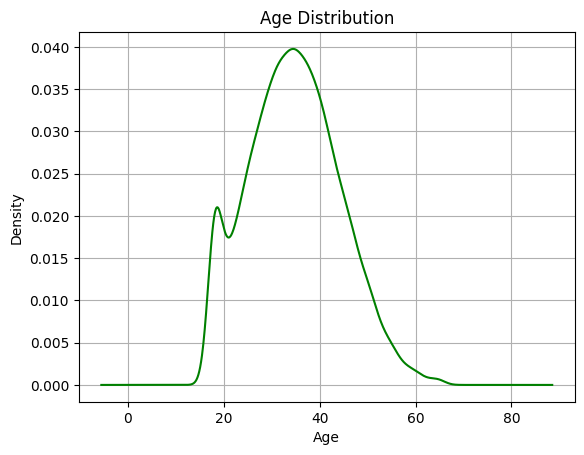

In [20]:
print("Minimum Age:", df_num.Age.min())
print("Maximum Age:", df_num.Age.max())
print(f"Mean Age: {df_num.Age.mean():.2f}")

df_num.Age.plot(kind='kde', color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.grid()
plt.show()

**Interpretation** 
 - Minimum Age: 18
 - Maximum Age: 65
 - Mean Age: 34.66
 - More participants are in the young to middle-age bracket (20-40).
 - Fewer older participants (above 50).

### Income_Level

Minimum Income Level: 10.0
Maximum Income Level: 107.14000000000001
Mean Income Level: 39.70


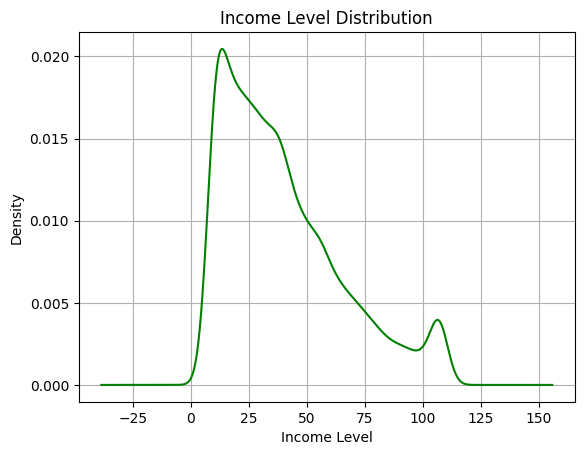

In [21]:
print("Minimum Income Level:", df_num.Income_Level.min())
print("Maximum Income Level:", df_num.Income_Level.max())
print(f"Mean Income Level: {df_num.Income_Level.mean():.2f}")

df_num.Income_Level.plot(kind='kde', color='green')
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.grid()
plt.show()

**Interpretation**
 - Minimum Income Level: 10.0
 - Maximum Income Level: 107.14000000000001
 - Mean Income Level: 39.70
 - Shape: Slightly right-skewed

### Purchase_Intent

Minimum Purchase Intent: 0.006
Maximum Purchase Intent: 0.917
Mean Purchase Intent: 0.37


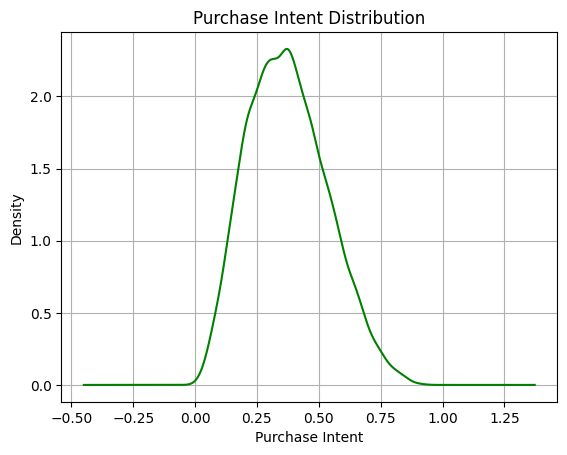

In [22]:
print("Minimum Purchase Intent:", df_num.Purchase_Intent.min())
print("Maximum Purchase Intent:", df_num.Purchase_Intent.max())
print(f"Mean Purchase Intent: {df_num.Purchase_Intent.mean():.2f}")

df_num.Purchase_Intent.plot(kind='kde', color='green')
plt.title('Purchase Intent Distribution')
plt.xlabel('Purchase Intent')
plt.grid()
plt.show()

**Interpretation** 
 - Minimum Purchase Intent: 0.006
 - Maximum Purchase Intent: 0.917
 - Mean Purchase Intent: 0.37
 - Majority of customers have a neutral to positive inclination towards buying.

### Price_Sensitivity

Minimum Price Sensitivity: 0.001
Maximum Price Sensitivity: 0.89
Mean Price Sensitivity: 0.29


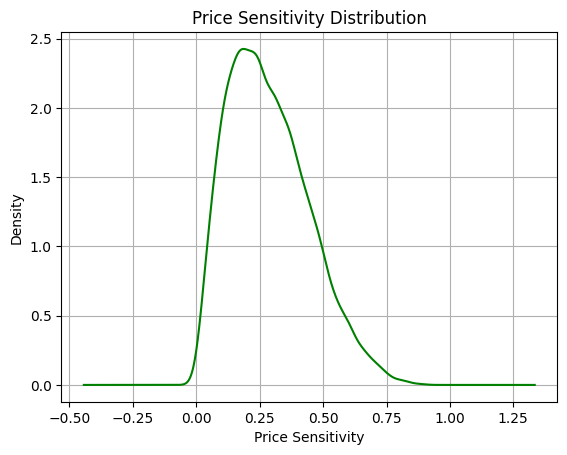

In [23]:
print("Minimum Price Sensitivity:", df_num.Price_Sensitivity.min())
print("Maximum Price Sensitivity:", df_num.Price_Sensitivity.max())
print(f"Mean Price Sensitivity: {df_num.Price_Sensitivity.mean():.2f}")

df_num.Price_Sensitivity.plot(kind='kde', color='green')
plt.title('Price Sensitivity Distribution')
plt.xlabel('Price Sensitivity')
plt.grid()
plt.show()

**Interpretation**
 - Minimum Price Sensitivity: 0.001
 - Maximum Price Sensitivity: 0.89
 - Mean Price Sensitivity: 0.29
 - Shape: Bell-shaped

### Distance_to_Supercharger

Minimum Distance to Supercharger: 0.0
Maximum Distance to Supercharger: 92.765
Mean Distance: 28.98


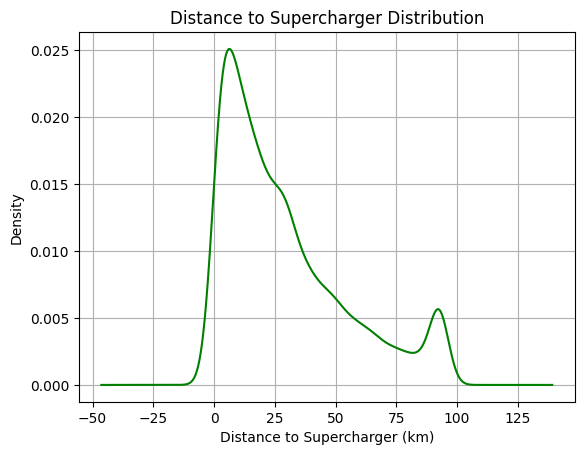

In [24]:
print("Minimum Distance to Supercharger:", df_num.Distance_to_Supercharger.min())
print("Maximum Distance to Supercharger:", df_num.Distance_to_Supercharger.max())
print(f"Mean Distance: {df_num.Distance_to_Supercharger.mean():.2f}")

df_num.Distance_to_Supercharger.plot(kind='kde', color='green')
plt.title('Distance to Supercharger Distribution')
plt.xlabel('Distance to Supercharger (km)')
plt.grid()
plt.show()

**Interpretation**
 - Minimum Distance to Supercharger: 0.0
 - Maximum Distance to Supercharger: 92.765
 - Mean Distance: 28.98
 - Shape: Right-skewed

### Import_Duty_Impact

Minimum Import Duty Impact: 0.0
Maximum Import Duty Impact: 1.0
Mean Import Duty Impact: 0.49


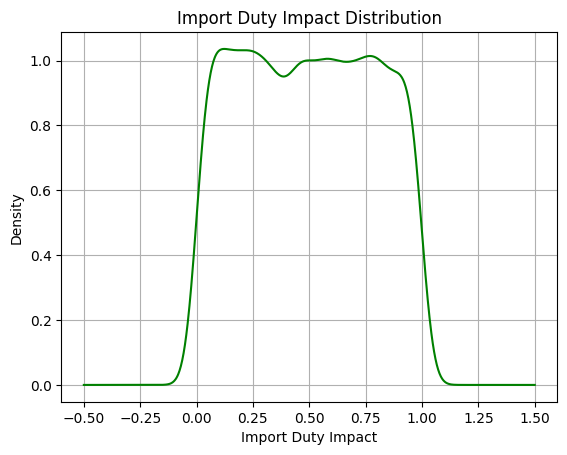

In [25]:
print("Minimum Import Duty Impact:", df_num.Import_Duty_Impact.min())
print("Maximum Import Duty Impact:", df_num.Import_Duty_Impact.max())
print(f"Mean Import Duty Impact: {df_num.Import_Duty_Impact.mean():.2f}")

df_num.Import_Duty_Impact.plot(kind='kde', color='green')
plt.title('Import Duty Impact Distribution')
plt.xlabel('Import Duty Impact')
plt.grid()
plt.show()

**Interpretation**
 - Minimum Import Duty Impact: 0.0
 - Maximum Import Duty Impact: 1.0
 - Mean Import Duty Impact: 0.49
 - Shape: Flat-topped distribution

### Local_Manufacturing_Support

Minimum Support: 0
Maximum Support: 1
Mean Support: 0.65


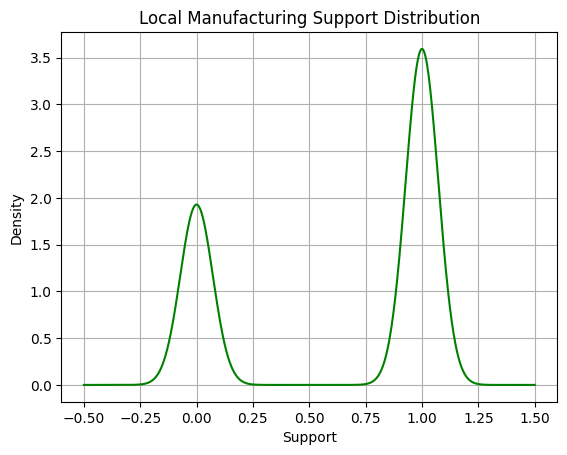

In [26]:
print("Minimum Support:", df_num.Local_Manufacturing_Support.min())
print("Maximum Support:", df_num.Local_Manufacturing_Support.max())
print(f"Mean Support: {df_num.Local_Manufacturing_Support.mean():.2f}")

df_num.Local_Manufacturing_Support.plot(kind='kde', color='green')
plt.title('Local Manufacturing Support Distribution')
plt.xlabel('Support')
plt.grid()
plt.show()

**Interpretation**
 - Minimum Support: 0
 - Maximum Support: 1
 - Mean Support: 0.65
 - Shape: Bimodal distribution

### Environmental_Concern

Minimum Environmental Concern: 0.0
Maximum Environmental Concern: 1.0
Mean Environmental Concern: 0.65


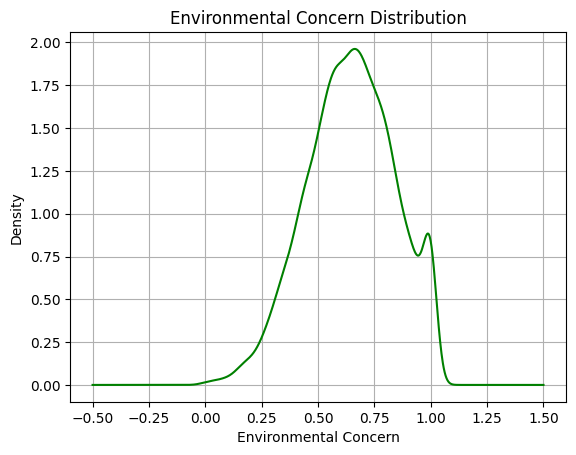

In [27]:
print("Minimum Environmental Concern:", df_num.Environmental_Concern.min())
print("Maximum Environmental Concern:", df_num.Environmental_Concern.max())
print(f"Mean Environmental Concern: {df_num.Environmental_Concern.mean():.2f}")

df_num.Environmental_Concern.plot(kind='kde', color='green')
plt.title('Environmental Concern Distribution')
plt.xlabel('Environmental Concern')
plt.grid()
plt.show()

**Interpretation**
 - Minimum Environmental Concern: 0.0
 - Maximum Environmental Concern: 1.0
 - Mean Environmental Concern: 0.65
 - this graph shows consumer concern about environmental impact.

### Competitor_Price

Minimum Competitor Price: 45.0
Maximum Competitor Price: 75.0
Mean Competitor Price: 60.07


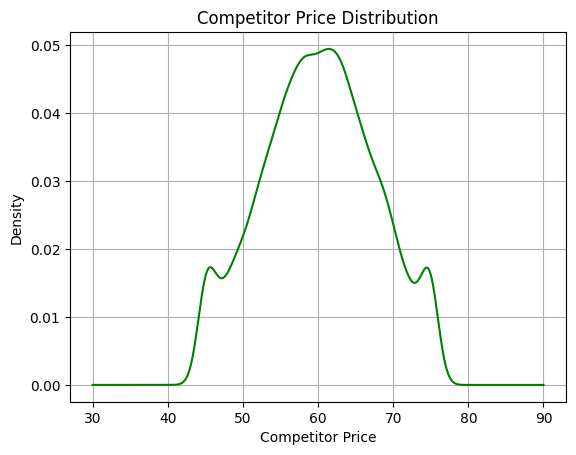

In [28]:
print("Minimum Competitor Price:", df_num.Competitor_Price.min())
print("Maximum Competitor Price:", df_num.Competitor_Price.max())
print(f"Mean Competitor Price: {df_num.Competitor_Price.mean():.2f}")

df_num.Competitor_Price.plot(kind='kde', color='green')
plt.title('Competitor Price Distribution')
plt.xlabel('Competitor Price')
plt.grid()
plt.show()

**Interpretation**
 - Minimum Competitor Price: 45.0
 - Maximum Competitor Price: 75.0
 - Mean Competitor Price: 60.07


### Univariate analysis on categorical data

In [29]:
df_cat.head()

,Location,Charging_Access,Brand_Loyalty,Tech_Savviness,Government_Incentive_Awareness
0,Hyderabad,Home,Competitor,High,Medium
1,Mumbai,Home,Competitor,High,Low
2,Mumbai,Home,Tesla,High,Low
3,Bangalore,Home,Competitor,High,Medium
4,Delhi,Public,Neutral,Low,Medium


In [30]:
df_cat.columns

Index(['Location', 'Charging_Access', 'Brand_Loyalty', 'Tech_Savviness',
       'Government_Incentive_Awareness'],
      dtype='object')

In [31]:
# finding the count
df_cat.Location.value_counts()

Location
Hyderabad    1835
Delhi        1804
Gurugram     1787
Pune         1786
Mumbai       1779
Bangalore    1777
Chennai      1732
Name: count, dtype: int64

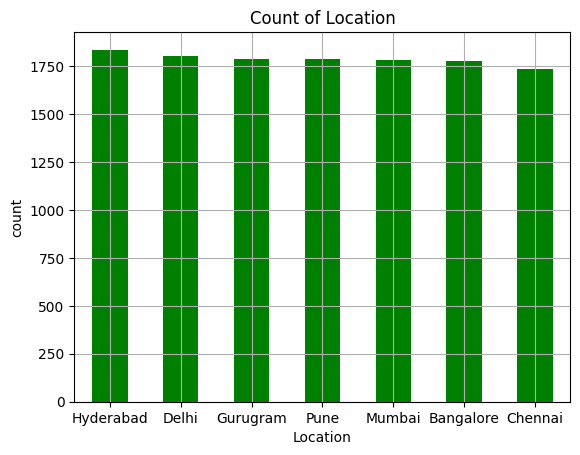

In [32]:
# show the plot
df_cat.Location.value_counts().plot(kind = 'bar',color='green')
plt.grid()
plt.title('Count of Location')
plt.xticks(rotation = 0) 
plt.ylabel('count')
plt.show()

**Interpretation** : 
  Counts of Location
 - Hyderabad    1835
 - Delhi        1804
 - Gurugram     1787
 - Pune         1786
 - Mumbai       1779
 - Bangalore    1777
 - Chennai      1732

### Charging_Access

In [33]:
# Count of Charging Access
df_cat.Charging_Access.value_counts()

Charging_Access
Home      9942
Public    2558
Name: count, dtype: int64

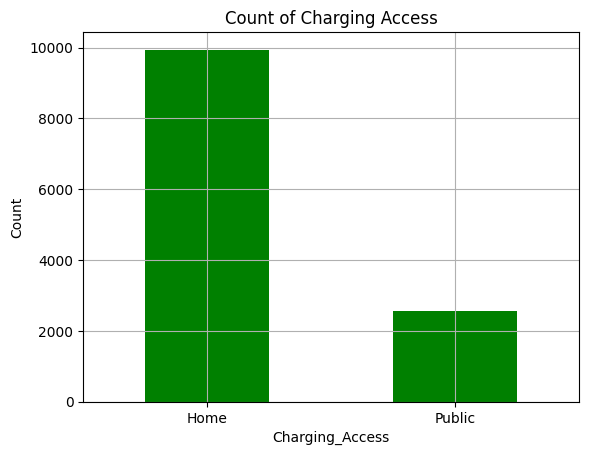

In [34]:
# Bar plot of Charging Access
df_cat.Charging_Access.value_counts().plot(kind='bar', color='green')
plt.grid()
plt.title('Count of Charging Access')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

**Interpretation** : 
   Counts of Charging_Access
 - Home      9942
 - Public    2558

### Brand_Loyalty

In [35]:
# Count of Brand Loyalty
df_cat.Brand_Loyalty.value_counts()

Brand_Loyalty
Competitor    5623
Neutral       3784
Tesla         3093
Name: count, dtype: int64

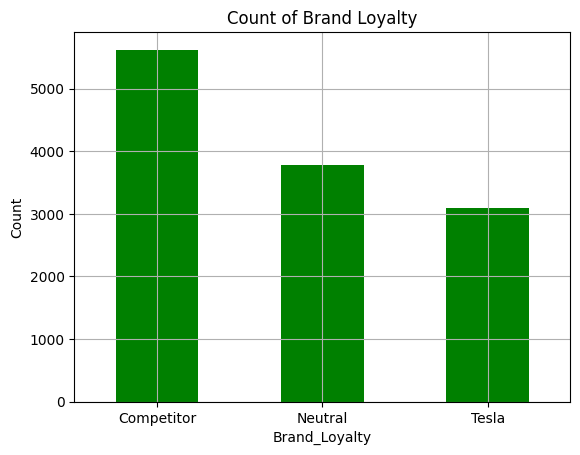

In [36]:
# Bar plot of Brand Loyalty
df_cat.Brand_Loyalty.value_counts().plot(kind='bar', color='green')
plt.grid()
plt.title('Count of Brand Loyalty')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

**Interpretation** : 
   Counts of Brand_Loyalty
 - Competitor    5623
 - Neutral       3784
 - Tesla         3093

###  Tech_Savviness



In [37]:
# Count of Tech Savviness
df_cat.Tech_Savviness.value_counts()

Tech_Savviness
Medium    5675
High      4357
Low       2468
Name: count, dtype: int64

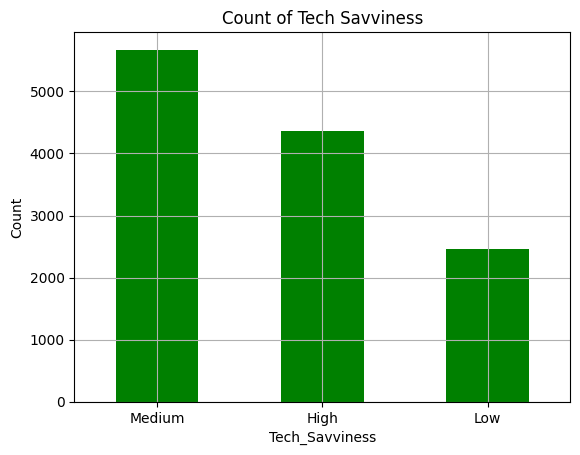

In [38]:
# Bar plot of Tech Savviness
df_cat.Tech_Savviness.value_counts().plot(kind='bar', color='green')
plt.grid()
plt.title('Count of Tech Savviness')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

**Interpretation** : 
   Counts of Tech_Savviness
 - Medium    5675
 - High      4357
 - Low       2468

### Government_Incentive_Awareness

In [39]:
# Count of Government Incentive Awareness
df_cat.Government_Incentive_Awareness.value_counts()

Government_Incentive_Awareness
Low       4997
Medium    4295
High      3208
Name: count, dtype: int64

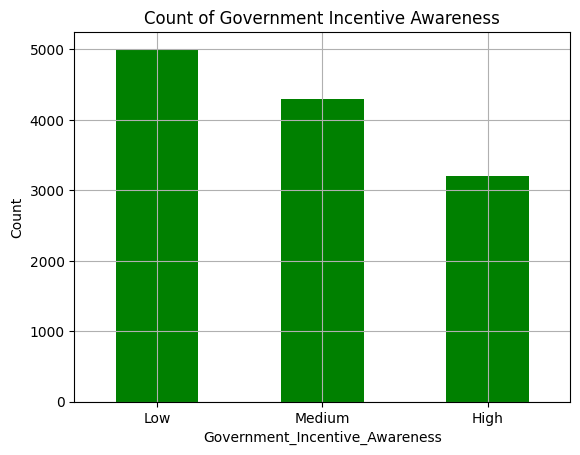

In [40]:
# Bar plot of Government Incentive Awareness
df_cat.Government_Incentive_Awareness.value_counts().plot(kind='bar', color='green')
plt.grid()
plt.title('Count of Government Incentive Awareness')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

**Interpretation** : 
   Counts of Government_Incentive_Awareness
 - Low       4997
 - Medium    4295
 - High      3208

### BIVARIATE ANALYSIS

In [41]:
# show the first 5 observations of the main data
df_tesla_market_data.head()

,Age,Income_Level,Location,Purchase_Intent,Price_Sensitivity,Charging_Access,Distance_to_Supercharger,Import_Duty_Impact,Local_Manufacturing_Support,Brand_Loyalty,Environmental_Concern,Tech_Savviness,Competitor_Price,Government_Incentive_Awareness
0,39,48.34,Hyderabad,0.334,0.472,Home,55.730,0.522,1,Competitor,0.521,High,53.08,Medium
1,33,13.35,Mumbai,0.315,0.250,Home,92.765,0.966,1,Competitor,0.506,High,46.02,Low
2,41,17.33,Mumbai,0.285,0.201,Home,53.720,0.578,1,Tesla,0.817,High,57.93,Low
3,50,13.90,Bangalore,0.228,0.108,Home,92.765,0.535,0,Competitor,0.724,High,68.37,Medium
4,32,33.20,Delhi,0.360,0.229,Public,63.170,0.052,1,Neutral,0.704,Low,63.86,Medium


In [42]:
# correlation matrix of the numerical data
df_num.corr()

,Age,Income_Level,Purchase_Intent,Price_Sensitivity,Distance_to_Supercharger,Import_Duty_Impact,Local_Manufacturing_Support,Environmental_Concern,Competitor_Price
Age,1.000000,0.005196,0.012288,-0.005384,-0.016754,0.008261,0.004854,0.001290,-0.000830
Income_Level,0.005196,1.000000,0.010558,-0.005007,0.009213,0.013792,-0.005853,0.010478,-0.002204
Purchase_Intent,0.012288,0.010558,1.000000,-0.007586,0.004294,-0.002357,0.025035,-0.001507,0.007826
Price_Sensitivity,-0.005384,-0.005007,-0.007586,1.000000,0.011596,0.007487,0.010273,0.014542,0.007308
Distance_to_Supercharger,-0.016754,0.009213,0.004294,0.011596,1.000000,-0.010671,-0.003195,0.008153,0.002078
Import_Duty_Impact,0.008261,0.013792,-0.002357,0.007487,-0.010671,1.000000,0.007873,0.011549,-0.003600
Local_Manufacturing_Support,0.004854,-0.005853,0.025035,0.010273,-0.003195,0.007873,1.000000,-0.003535,-0.013669
Environmental_Concern,0.001290,0.010478,-0.001507,0.014542,0.008153,0.011549,-0.003535,1.000000,0.010948
Competitor_Price,-0.000830,-0.002204,0.007826,0.007308,0.002078,-0.003600,-0.013669,0.010948,1.000000


**INTERPRETATION**
 - We do not have any correlated numerical columns

### BIVARIATE ANALYSIS ON 1 NUMERICAL AND 1 CATEGORICAL COLUMN

In [43]:
# show the categorical columns
df_cat.columns

Index(['Location', 'Charging_Access', 'Brand_Loyalty', 'Tech_Savviness',
       'Government_Incentive_Awareness'],
      dtype='object')

In [44]:
# show the numerical columns
df_num.columns

Index(['Age', 'Income_Level', 'Purchase_Intent', 'Price_Sensitivity',
       'Distance_to_Supercharger', 'Import_Duty_Impact',
       'Local_Manufacturing_Support', 'Environmental_Concern',
       'Competitor_Price'],
      dtype='object')

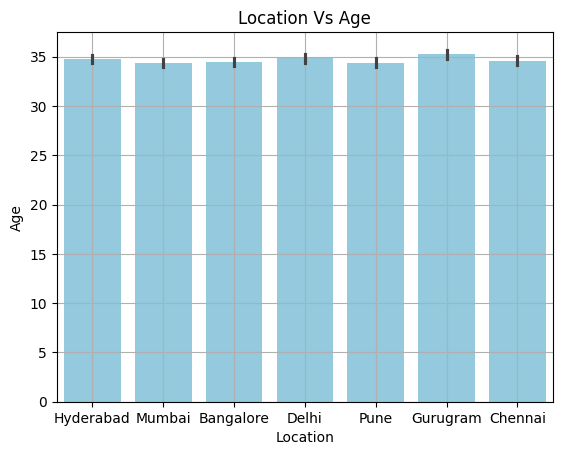

In [45]:
# plot the bar graph
sns.barplot(x='Location',y='Age',data = df_tesla_market_data,color='skyblue')
plt.title('Location Vs Age')
plt.grid()
plt.show()

**Interpretation**
 - Age is not varying much by location, the customer base is uniform in age across cities.

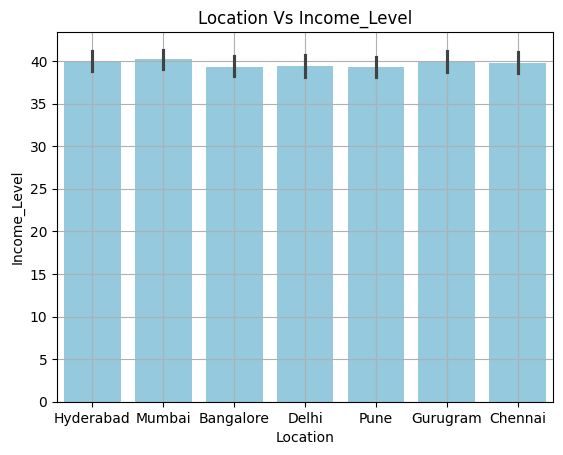

In [46]:
# plot the bar graph
sns.barplot(x='Location',y='Income_Level',data = df_tesla_market_data,color='skyblue')
plt.title('Location Vs Income_Level')
plt.grid()
plt.show()

**Interpretation**
 - Income levels are also very similar across all locations. It is Slightly higher in Delhi and Gurgaon, but difference is very small.

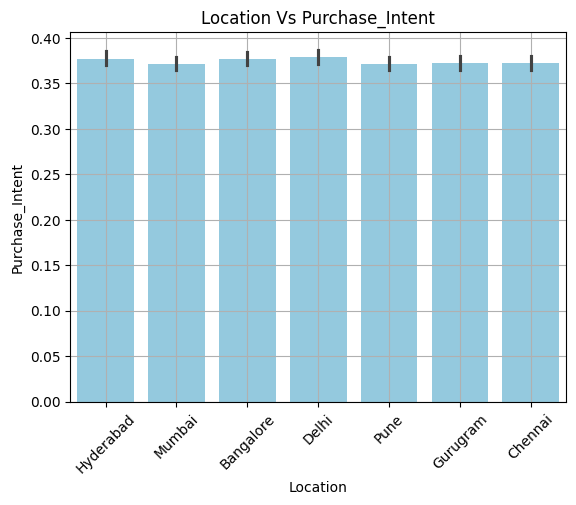

In [47]:
sns.barplot(x='Location', y='Purchase_Intent', data=df_tesla_market_data, color='skyblue')
plt.title('Location Vs Purchase_Intent')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - Customers in all cities are equally likely to consider buying 

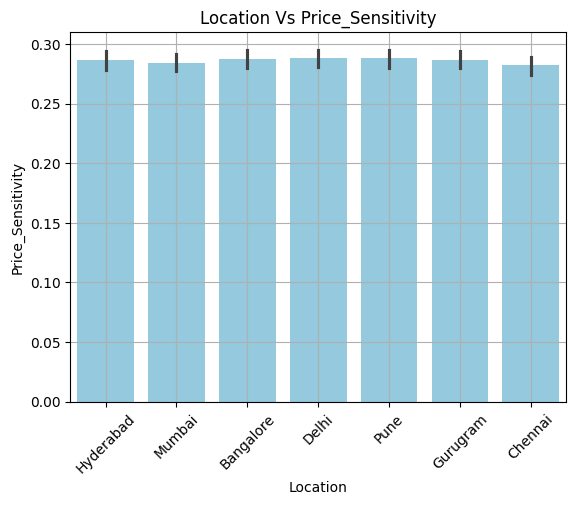

In [48]:
sns.barplot(x='Location', y='Price_Sensitivity', data=df_tesla_market_data, color='skyblue')
plt.title('Location Vs Price_Sensitivity')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - Price sensitivity is quite similar across cities.

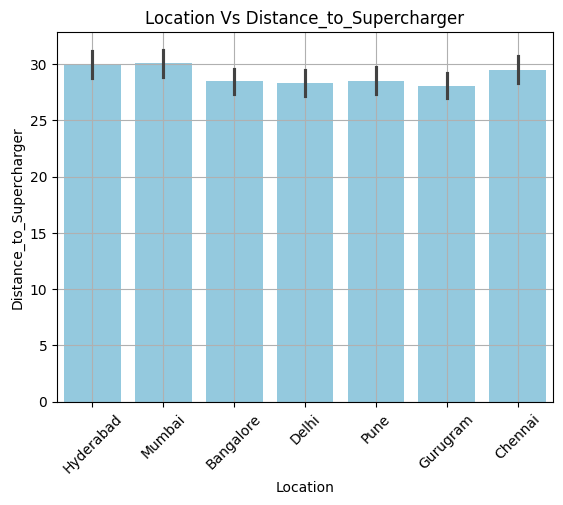

In [49]:
sns.barplot(x='Location', y='Distance_to_Supercharger', data=df_tesla_market_data, color='skyblue')
plt.title('Location Vs Distance_to_Supercharger')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - Hyderabad and Mumbai have a slightly higher distance to superchargers.



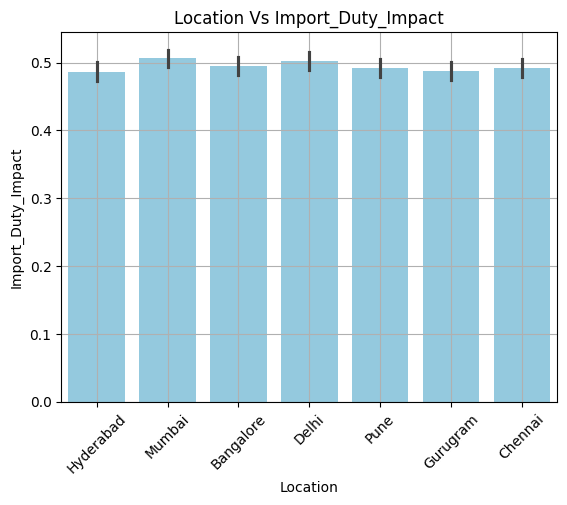

In [50]:
sns.barplot(x='Location', y='Import_Duty_Impact', data=df_tesla_market_data, color='skyblue')
plt.title('Location Vs Import_Duty_Impact')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - Slightly higher in Hyderabad and Mumbai.

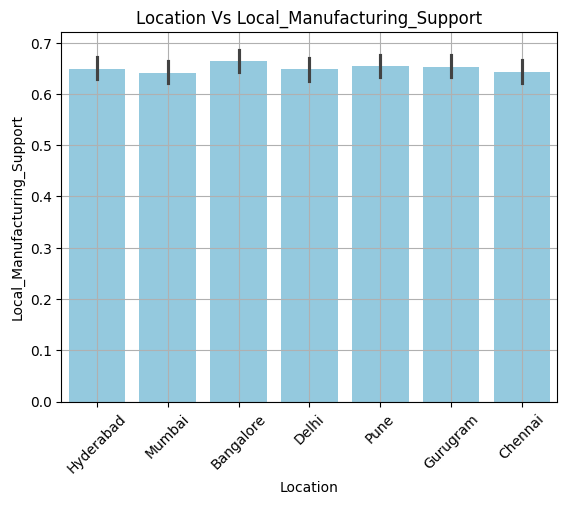

In [51]:
sns.barplot(x='Location', y='Local_Manufacturing_Support', data=df_tesla_market_data, color='skyblue')
plt.title('Location Vs Local_Manufacturing_Support')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - Support/expectation for local manufacturing is very similar across all cities.

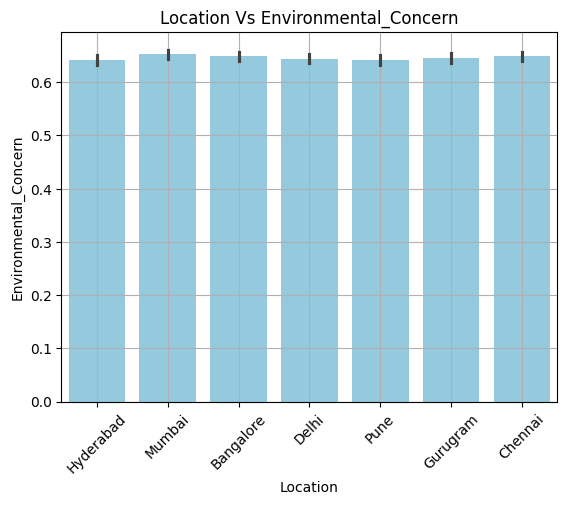

In [52]:
sns.barplot(x='Location', y='Environmental_Concern', data=df_tesla_market_data, color='skyblue')
plt.title('Location Vs Environmental_Concern')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - Environmental concern is almost the same across all locations, slightly higher in Chennai and Bangalore.

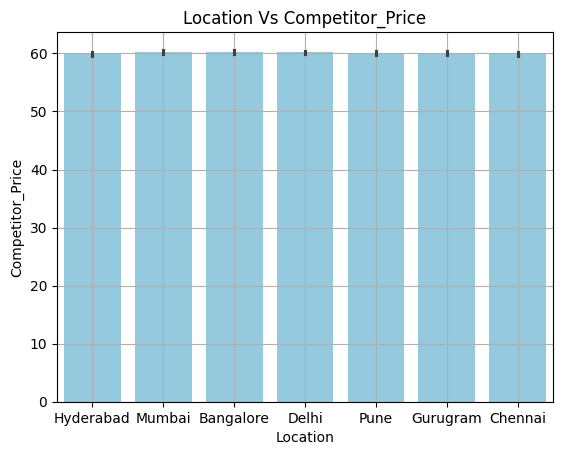

In [53]:
sns.barplot(x='Location', y='Competitor_Price', data=df_tesla_market_data, color='skyblue')
plt.title('Location Vs Competitor_Price')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Interpretation**
 - Compeititor Price is similar across all locations.

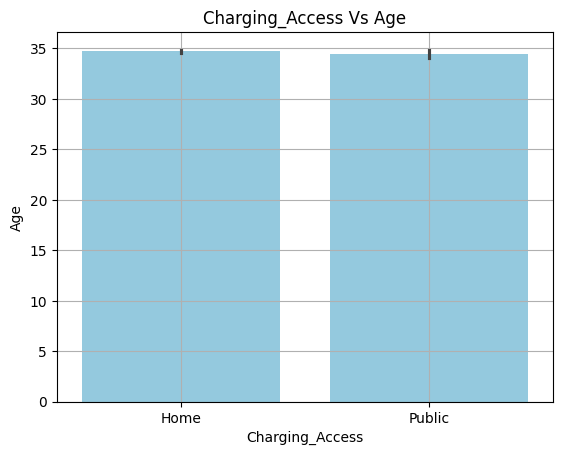

In [54]:
sns.barplot(x='Charging_Access', y='Age', data=df_tesla_market_data, color='skyblue')
plt.title('Charging_Access Vs Age')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Interpretation**
 - Charging Access of Home is slightly higher than the public.

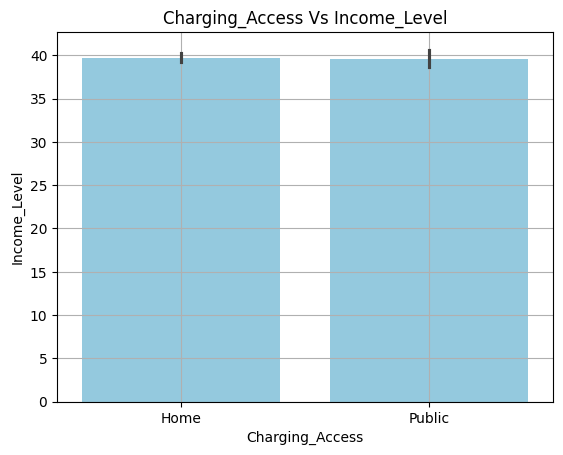

In [55]:
sns.barplot(x='Charging_Access', y='Income_Level', data=df_tesla_market_data, color='skyblue')
plt.title('Charging_Access Vs Income_Level')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Interpretation**
 - Income level are almost similar.

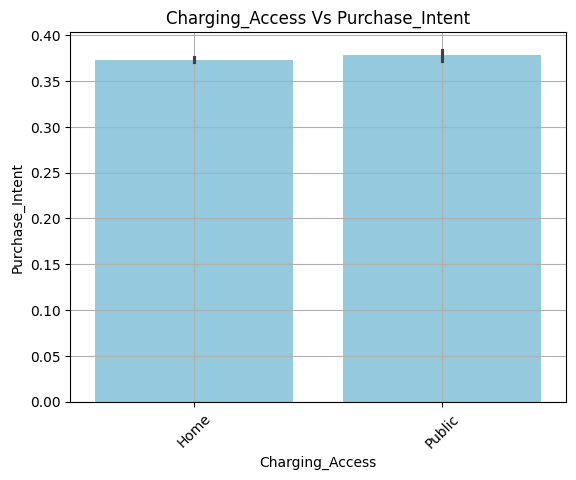

In [56]:
sns.barplot(x='Charging_Access', y='Purchase_Intent', data=df_tesla_market_data, color='skyblue')
plt.title('Charging_Access Vs Purchase_Intent')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - Public Purchase Intent is more as compared to Home.

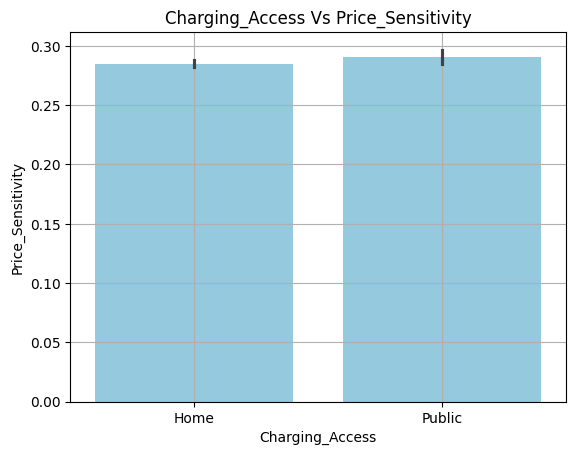

In [57]:
sns.barplot(x='Charging_Access', y='Price_Sensitivity', data=df_tesla_market_data, color='skyblue')
plt.title('Charging_Access Vs Price_Sensitivity')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Interpretation**
 - Price sensitivity of Public is slightly more than home.

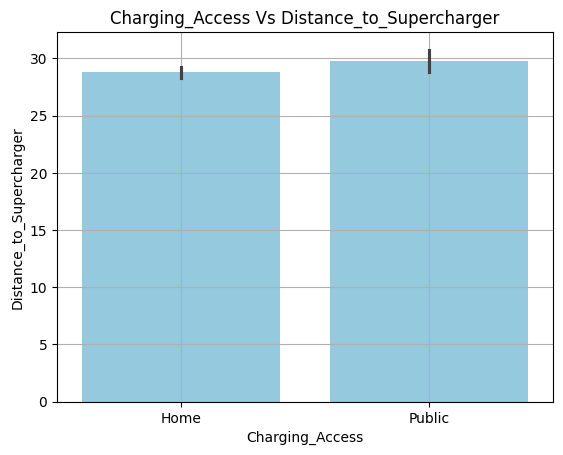

In [58]:
sns.barplot(x='Charging_Access', y='Distance_to_Supercharger', data=df_tesla_market_data, color='skyblue')
plt.title('Charging_Access Vs Distance_to_Supercharger')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Interpretation**
 - Distance to superchanger of public is more than home.

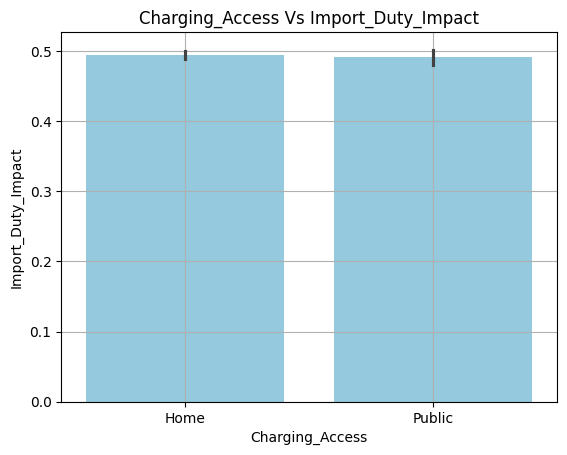

In [59]:
sns.barplot(x='Charging_Access', y='Import_Duty_Impact', data=df_tesla_market_data, color='skyblue')
plt.title('Charging_Access Vs Import_Duty_Impact')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Interpretation**
 - Home has More impact on import duty than Public.

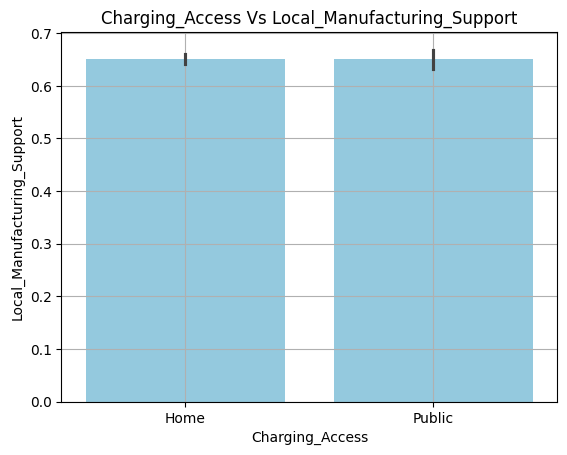

In [60]:
sns.barplot(x='Charging_Access', y='Local_Manufacturing_Support', data=df_tesla_market_data, color='skyblue')
plt.title('Charging_Access Vs Local_Manufacturing_Support')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Interpretation**
 - Home and public charging access has equally local manufacturing support.

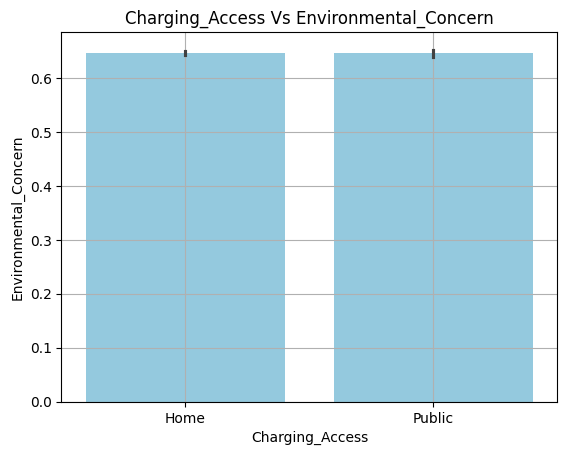

In [61]:
sns.barplot(x='Charging_Access', y='Environmental_Concern', data=df_tesla_market_data, color='skyblue')
plt.title('Charging_Access Vs Environmental_Concern')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Interpretation**
 - It is similar for both home and public Charging access

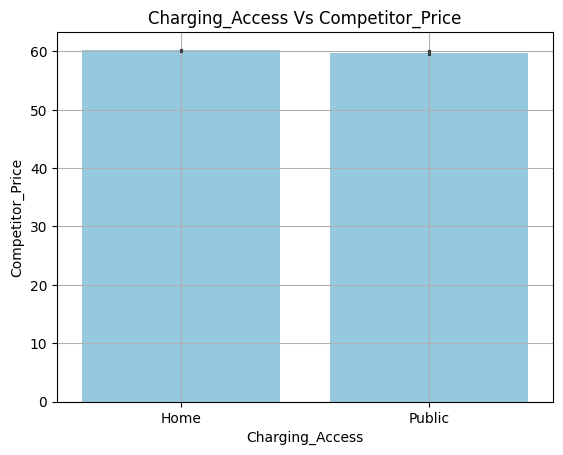

In [62]:
sns.barplot(x='Charging_Access', y='Competitor_Price', data=df_tesla_market_data, color='skyblue')
plt.title('Charging_Access Vs Competitor_Price')
plt.xticks(rotation=0)
plt.grid()
plt.show()

**Interpretation**
 - Price of home is more than public, but only a slight Variation is there.

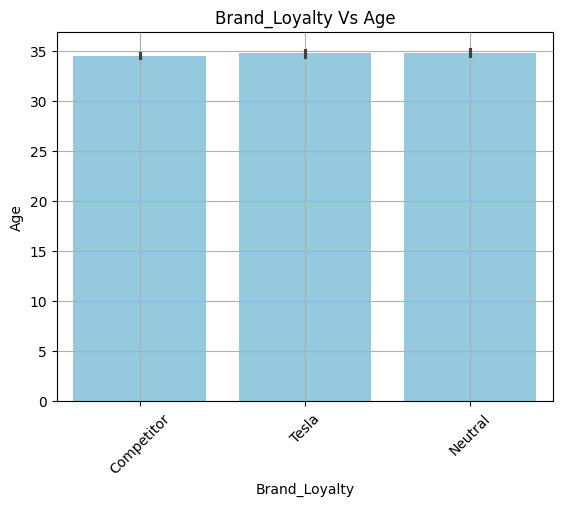

In [63]:
sns.barplot(x='Brand_Loyalty', y='Age', data=df_tesla_market_data, color='skyblue')
plt.title('Brand_Loyalty Vs Age')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - The average Age across all three brand loyalty segments — Competitor, Tesla, and Neutral — is almost the same (~35 years).

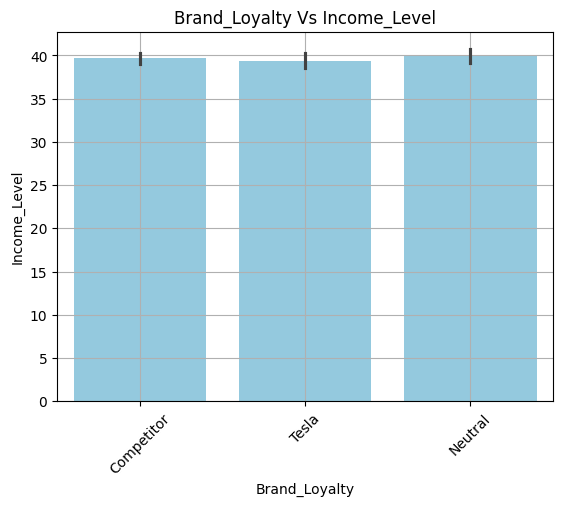

In [64]:
sns.barplot(x='Brand_Loyalty', y='Income_Level', data=df_tesla_market_data, color='skyblue')
plt.title('Brand_Loyalty Vs Income_Level')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - The Income level across all three brand loyalty segments — Competitor, Tesla, and Neutral — is almost the same, Neutral being the highest.

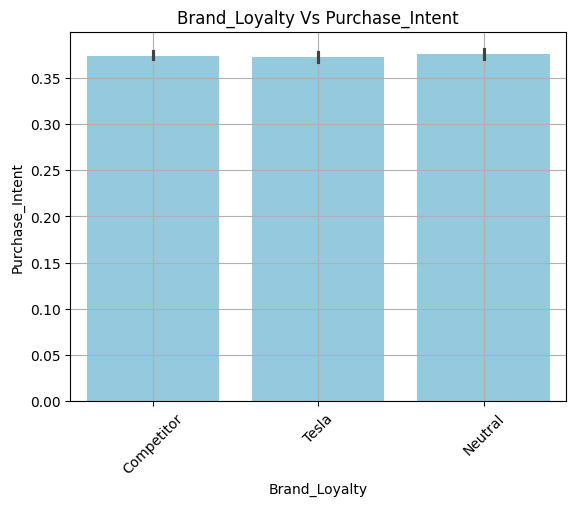

In [65]:
sns.barplot(x='Brand_Loyalty', y='Purchase_Intent', data=df_tesla_market_data, color='skyblue')
plt.title('Brand_Loyalty Vs Purchase_Intent')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - The purchase intent across all three brand loyalty segments — Competitor, Tesla, and Neutral — is almost the same.

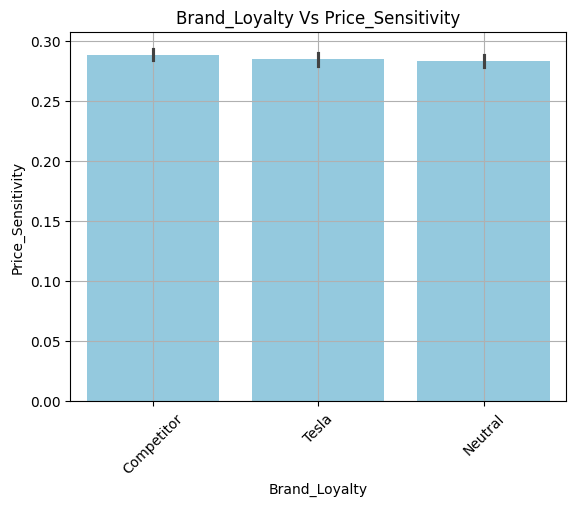

In [66]:
sns.barplot(x='Brand_Loyalty', y='Price_Sensitivity', data=df_tesla_market_data, color='skyblue')
plt.title('Brand_Loyalty Vs Price_Sensitivity')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - The price sensitivity among all three brand loyalty segments - is highest for the compeititor.

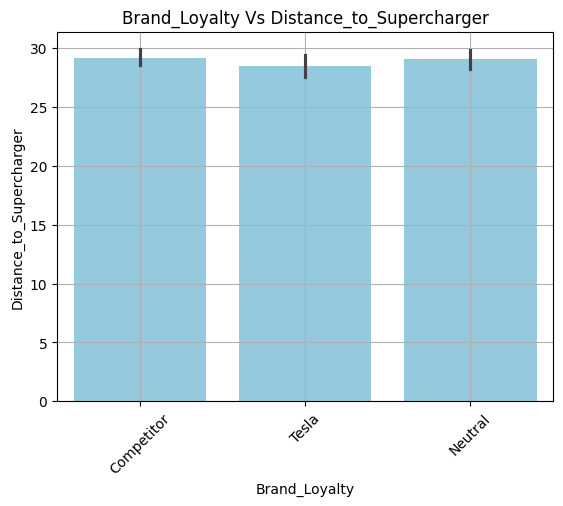

In [67]:
sns.barplot(x='Brand_Loyalty', y='Distance_to_Supercharger', data=df_tesla_market_data, color='skyblue')
plt.title('Brand_Loyalty Vs Distance_to_Supercharger')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - brand loyalty segments — Competitor and Neutral — is almost the same.

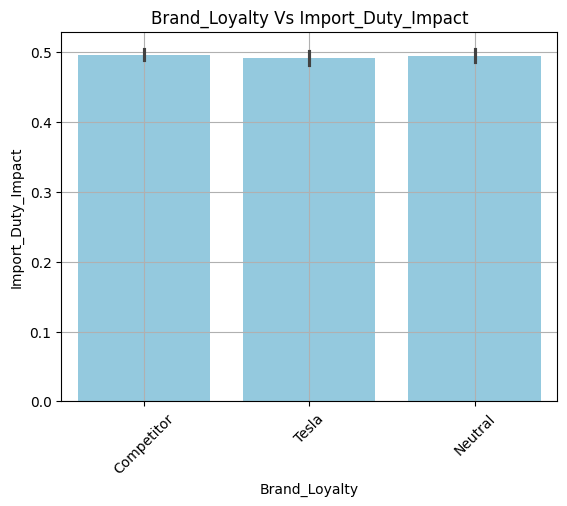

In [68]:
sns.barplot(x='Brand_Loyalty', y='Import_Duty_Impact', data=df_tesla_market_data, color='skyblue')
plt.title('Brand_Loyalty Vs Import_Duty_Impact')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - The import duty impact across all three brand loyalty segments — is the highest for Competitor.

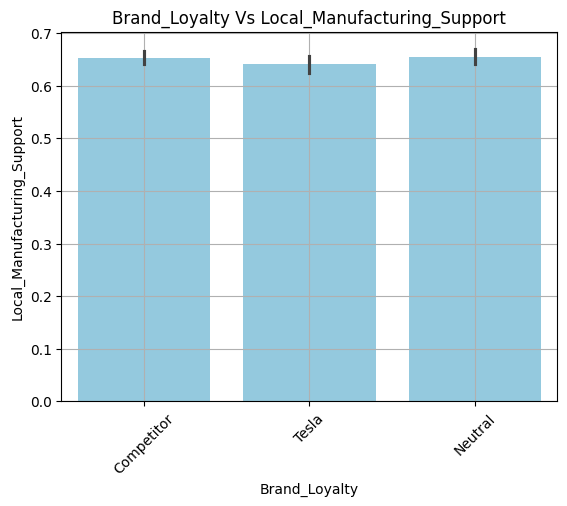

In [69]:
sns.barplot(x='Brand_Loyalty', y='Local_Manufacturing_Support', data=df_tesla_market_data, color='skyblue')
plt.title('Brand_Loyalty Vs Local_Manufacturing_Support')
plt.xticks(rotation=45)
plt.grid()
plt.show()

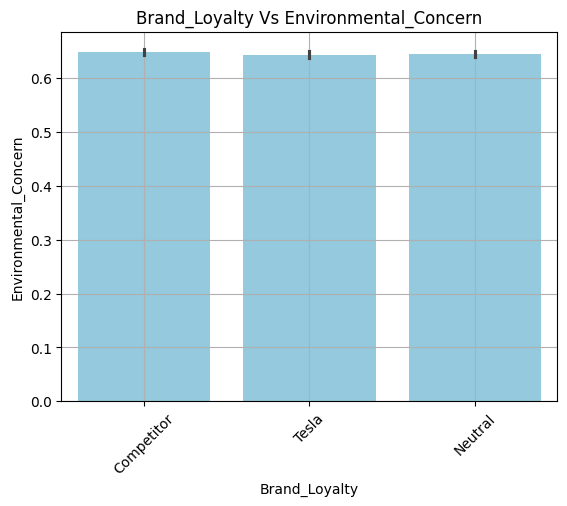

In [70]:
sns.barplot(x='Brand_Loyalty', y='Environmental_Concern', data=df_tesla_market_data, color='skyblue')
plt.title('Brand_Loyalty Vs Environmental_Concern')
plt.xticks(rotation=45)
plt.grid()
plt.show()

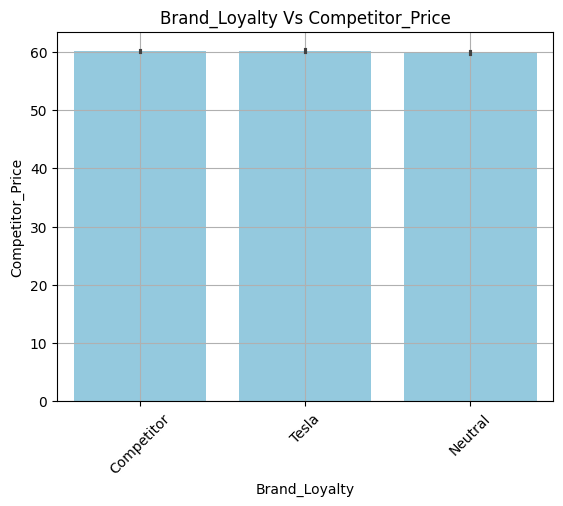

In [71]:
sns.barplot(x='Brand_Loyalty', y='Competitor_Price', data=df_tesla_market_data, color='skyblue')
plt.title('Brand_Loyalty Vs Competitor_Price')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - The compeititor price across all three brand loyalty segments — Competitor, Tesla, and Neutral — is same.

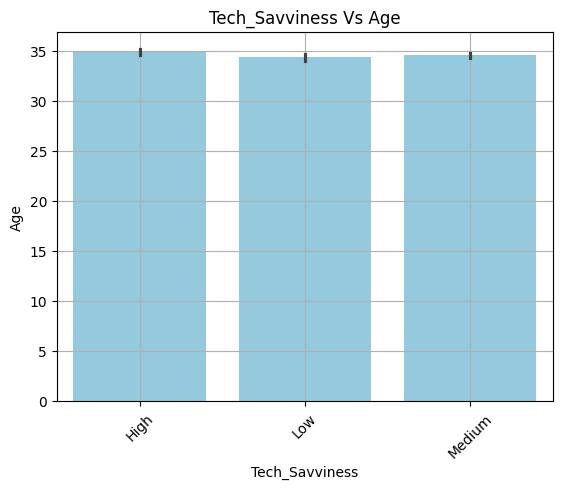

In [72]:
sns.barplot(x='Tech_Savviness', y='Age', data=df_tesla_market_data, color='skyblue')
plt.title('Tech_Savviness Vs Age')
plt.xticks(rotation=45)
plt.grid()
plt.show()

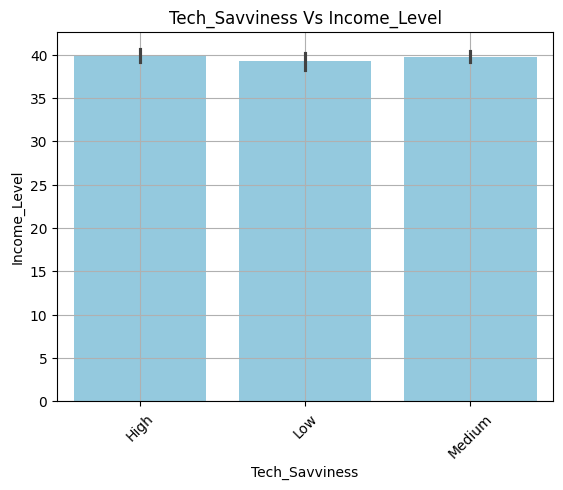

In [73]:
sns.barplot(x='Tech_Savviness', y='Income_Level', data=df_tesla_market_data, color='skyblue')
plt.title('Tech_Savviness Vs Income_Level')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
 - The Income Level across different Tech Savviness categories (High, Low, Medium) is almost the same (~39-40).



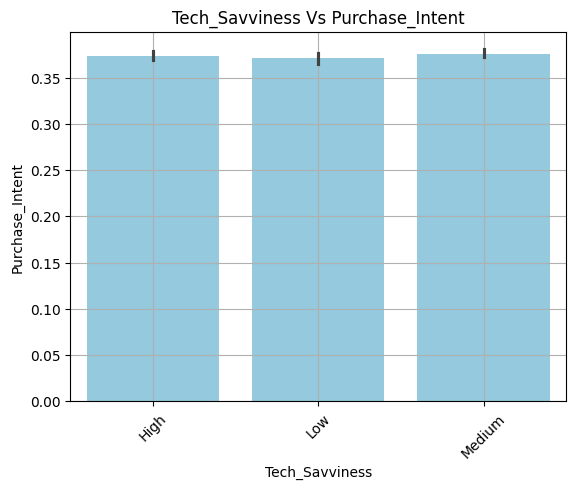

In [74]:
sns.barplot(x='Tech_Savviness', y='Purchase_Intent', data=df_tesla_market_data, color='skyblue')
plt.title('Tech_Savviness Vs Purchase_Intent')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
- The purchase intent across different Tech Savviness categories (High, Low, Medium) is almost the same.



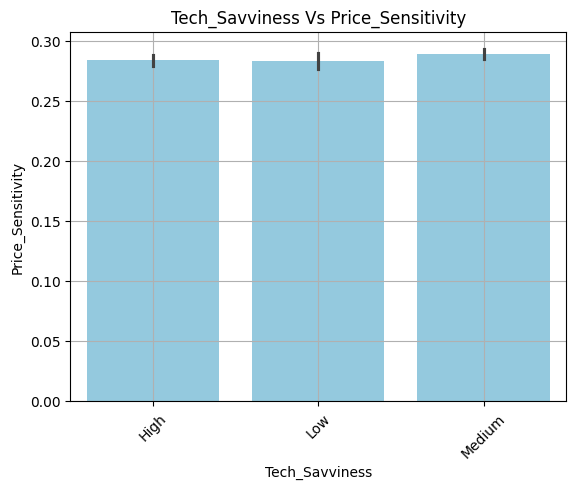

In [75]:
sns.barplot(x='Tech_Savviness', y='Price_Sensitivity', data=df_tesla_market_data, color='skyblue')
plt.title('Tech_Savviness Vs Price_Sensitivity')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
- Price Sensitivity for medium is the highest.



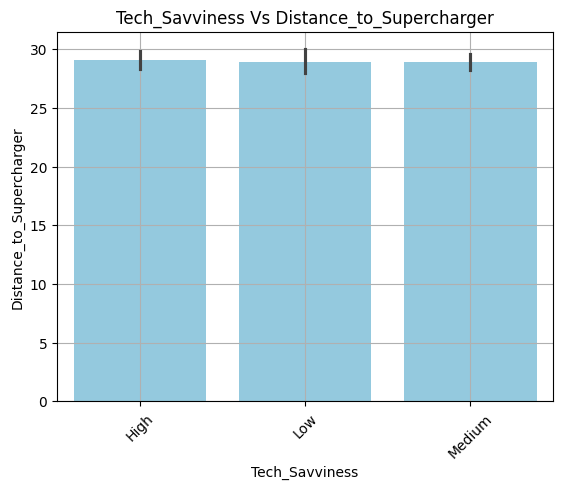

In [76]:
sns.barplot(x='Tech_Savviness', y='Distance_to_Supercharger', data=df_tesla_market_data, color='skyblue')
plt.title('Tech_Savviness Vs Distance_to_Supercharger')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
- Distance to superchanger is almost the same for all the categories.



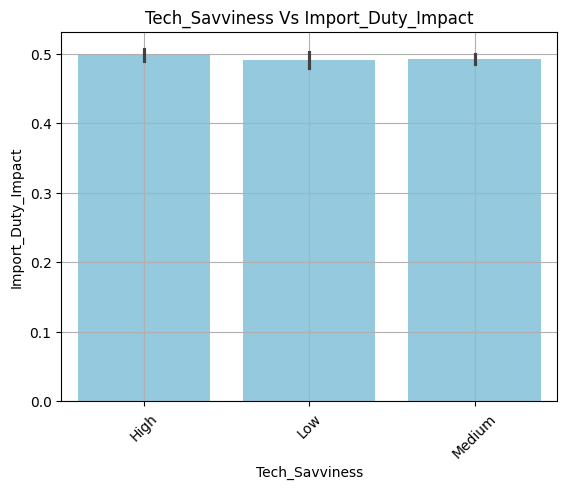

In [77]:
sns.barplot(x='Tech_Savviness', y='Import_Duty_Impact', data=df_tesla_market_data, color='skyblue')
plt.title('Tech_Savviness Vs Import_Duty_Impact')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
- Import duty impact Is high.

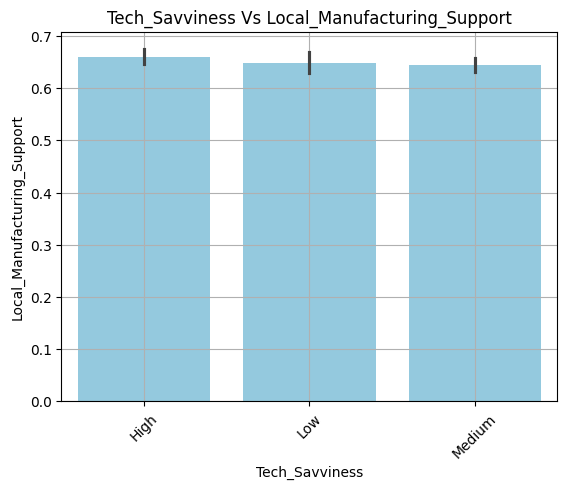

In [78]:
sns.barplot(x='Tech_Savviness', y='Local_Manufacturing_Support', data=df_tesla_market_data, color='skyblue')
plt.title('Tech_Savviness Vs Local_Manufacturing_Support')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Interpretation**
- Local manufacturing support is high.

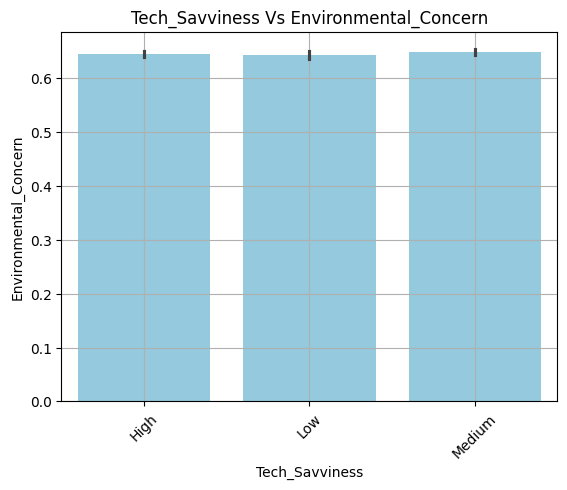

In [79]:
sns.barplot(x='Tech_Savviness', y='Environmental_Concern', data=df_tesla_market_data, color='skyblue')
plt.title('Tech_Savviness Vs Environmental_Concern')
plt.xticks(rotation=45)
plt.grid()
plt.show()

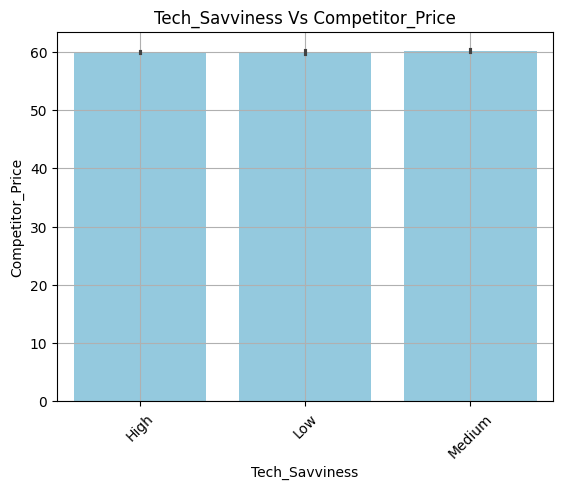

In [80]:
sns.barplot(x='Tech_Savviness', y='Competitor_Price', data=df_tesla_market_data, color='skyblue')
plt.title('Tech_Savviness Vs Competitor_Price')
plt.xticks(rotation=45)
plt.grid()
plt.show()

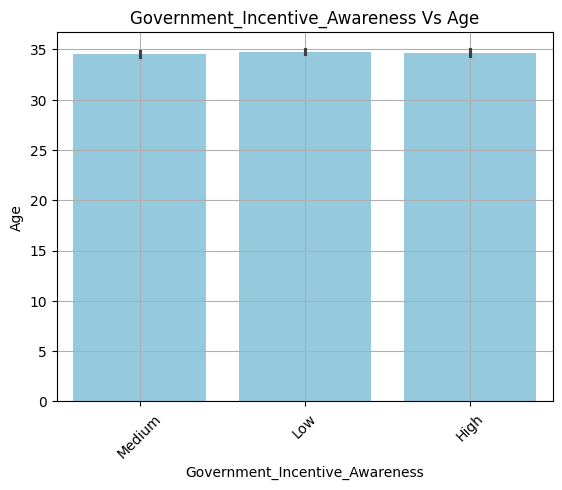

In [81]:
sns.barplot(x='Government_Incentive_Awareness', y='Age', data=df_tesla_market_data, color='skyblue')
plt.title('Government_Incentive_Awareness Vs Age')
plt.xticks(rotation=45)
plt.grid()
plt.show()

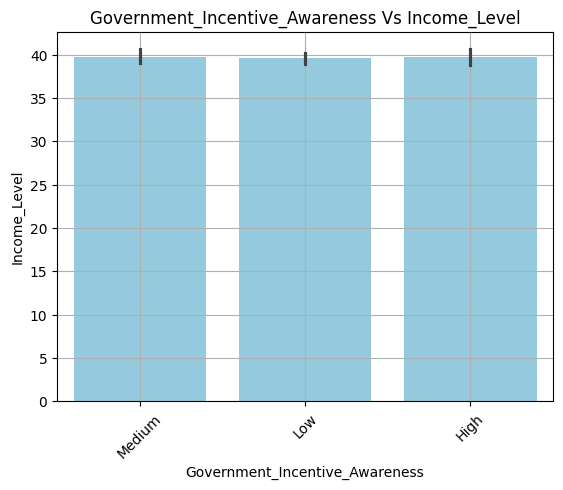

In [82]:
sns.barplot(x='Government_Incentive_Awareness', y='Income_Level', data=df_tesla_market_data, color='skyblue')
plt.title('Government_Incentive_Awareness Vs Income_Level')
plt.xticks(rotation=45)
plt.grid()
plt.show()

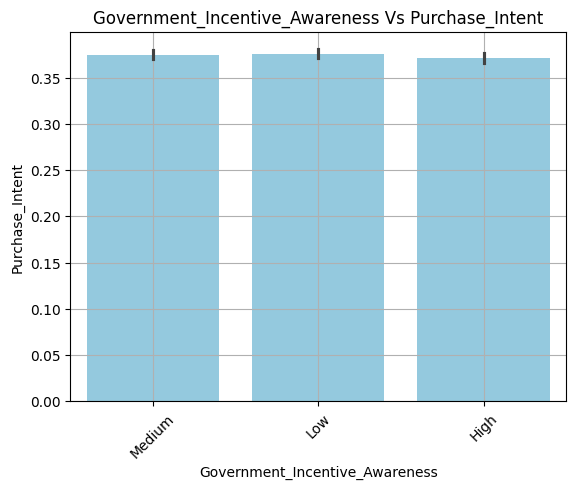

In [83]:
sns.barplot(x='Government_Incentive_Awareness', y='Purchase_Intent', data=df_tesla_market_data, color='skyblue')
plt.title('Government_Incentive_Awareness Vs Purchase_Intent')
plt.xticks(rotation=45)
plt.grid()
plt.show()

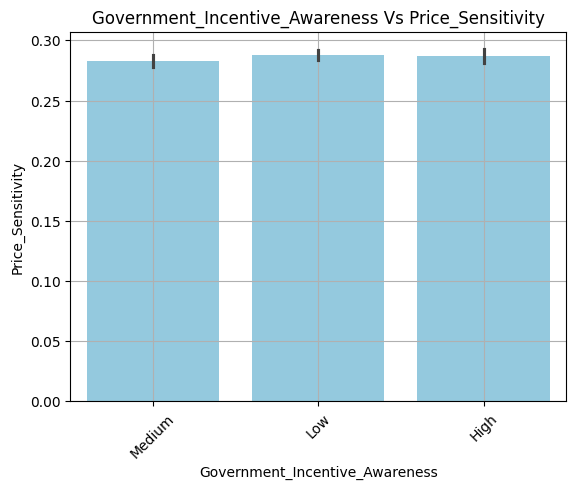

In [84]:
sns.barplot(x='Government_Incentive_Awareness', y='Price_Sensitivity', data=df_tesla_market_data, color='skyblue')
plt.title('Government_Incentive_Awareness Vs Price_Sensitivity')
plt.xticks(rotation=45)
plt.grid()
plt.show()

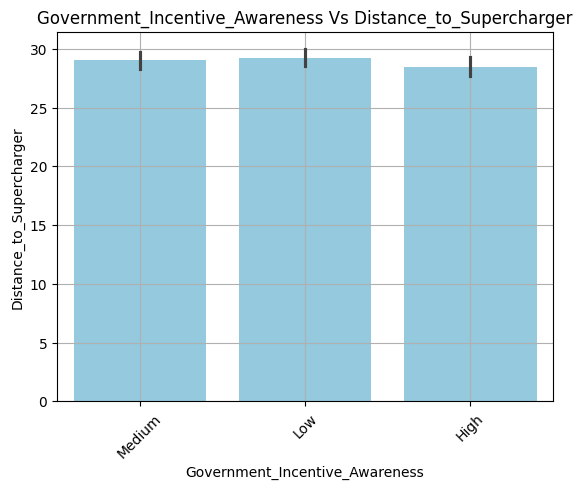

In [85]:
sns.barplot(x='Government_Incentive_Awareness', y='Distance_to_Supercharger', data=df_tesla_market_data, color='skyblue')
plt.title('Government_Incentive_Awareness Vs Distance_to_Supercharger')
plt.xticks(rotation=45)
plt.grid()
plt.show()

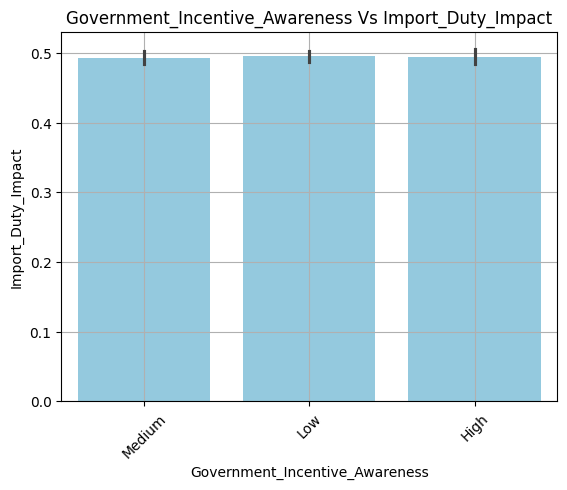

In [86]:
sns.barplot(x='Government_Incentive_Awareness', y='Import_Duty_Impact', data=df_tesla_market_data, color='skyblue')
plt.title('Government_Incentive_Awareness Vs Import_Duty_Impact')
plt.xticks(rotation=45)
plt.grid()
plt.show()

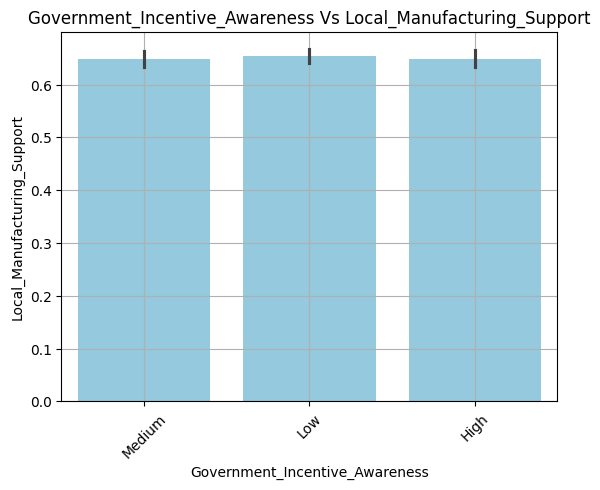

In [87]:
sns.barplot(x='Government_Incentive_Awareness', y='Local_Manufacturing_Support', data=df_tesla_market_data, color='skyblue')
plt.title('Government_Incentive_Awareness Vs Local_Manufacturing_Support')
plt.xticks(rotation=45)
plt.grid()
plt.show()

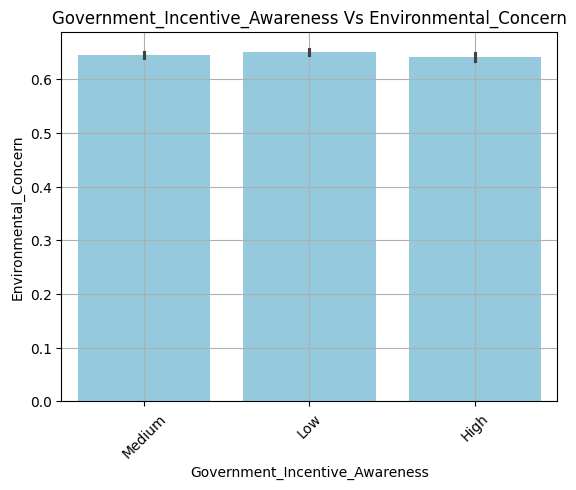

In [88]:
sns.barplot(x='Government_Incentive_Awareness', y='Environmental_Concern', data=df_tesla_market_data, color='skyblue')
plt.title('Government_Incentive_Awareness Vs Environmental_Concern')
plt.xticks(rotation=45)
plt.grid()
plt.show()

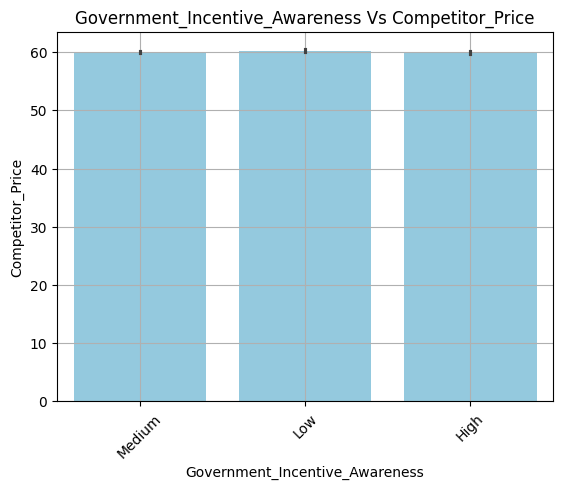

In [89]:
sns.barplot(x='Government_Incentive_Awareness', y='Competitor_Price', data=df_tesla_market_data, color='skyblue')
plt.title('Government_Incentive_Awareness Vs Competitor_Price')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Multivaraite Analysis

#### Correlation Matrix

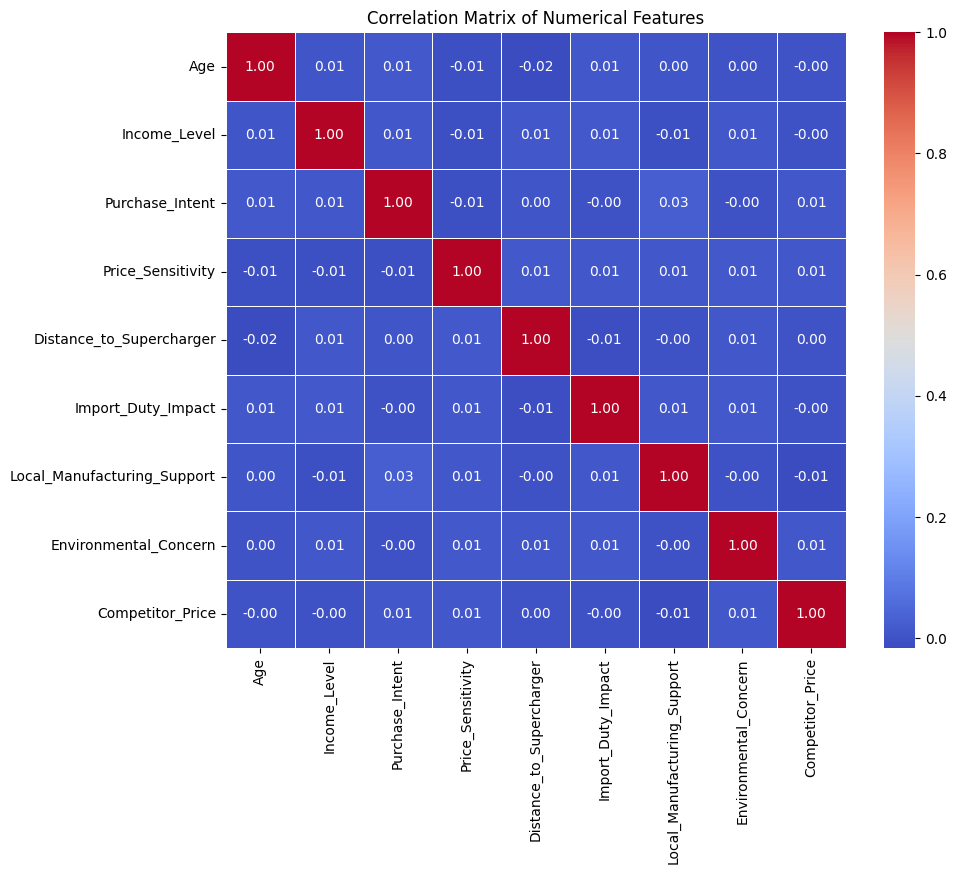

In [90]:
plt.figure(figsize=(10, 8))
corr_matrix = df_num.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**Interpretation**
 - Most correlations are very close to 0 i.e. no linear relationship.
 - The diagonal is 1.0 because a feature is perfectly correlated with itself.



#### Multivariate Linear Plot 

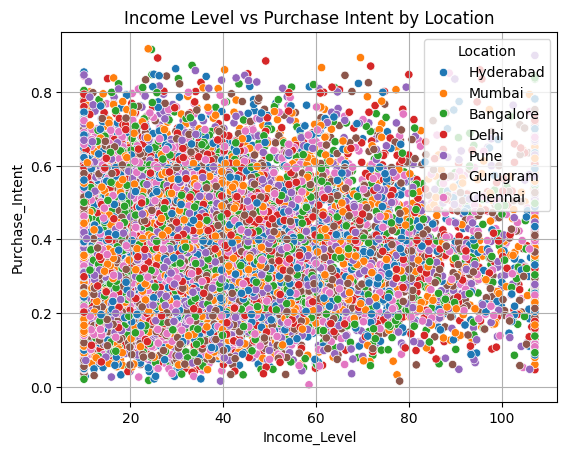

In [91]:
sns.scatterplot(x='Income_Level', y='Purchase_Intent', hue='Location', data=df_tesla_market_data)
plt.title("Income Level vs Purchase Intent by Location")
plt.grid()
plt.show()

**Interpretation**
 - No clear linear relationship between Income_Level and Purchase_Intent → Purchase Intent exists across all income levels.
 - Purchase Intent is highly scattered, indicating that people across all income groups show varying levels of interest.



#### Box Plot

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17592\4249794144.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Charging_Access', y='Age', data=df_tesla_market_data, palette='Set2')


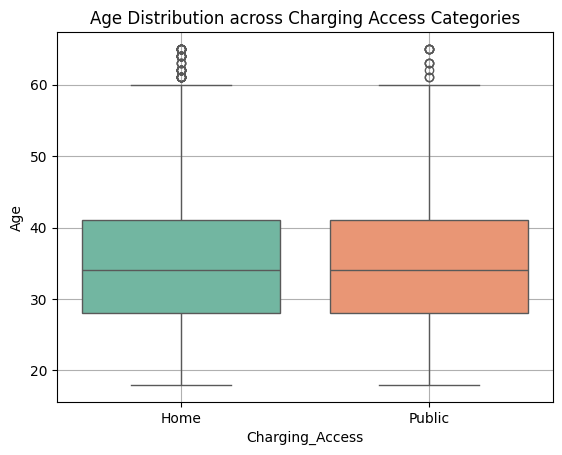

In [92]:
sns.boxplot(x='Charging_Access', y='Age', data=df_tesla_market_data, palette='Set2')
plt.title("Age Distribution across Charging Access Categories")
plt.grid()
plt.show()

**Interpretation**
 - Slight age difference: older and more varied age groups tend to prefer Home charging, while Public charging is more popular among middle-aged users.

### Decide the target variable

In [93]:
# check the data frame to decide the target variable 
df_tesla_market_data.head()

,Age,Income_Level,Location,Purchase_Intent,Price_Sensitivity,Charging_Access,Distance_to_Supercharger,Import_Duty_Impact,Local_Manufacturing_Support,Brand_Loyalty,Environmental_Concern,Tech_Savviness,Competitor_Price,Government_Incentive_Awareness
0,39,48.34,Hyderabad,0.334,0.472,Home,55.730,0.522,1,Competitor,0.521,High,53.08,Medium
1,33,13.35,Mumbai,0.315,0.250,Home,92.765,0.966,1,Competitor,0.506,High,46.02,Low
2,41,17.33,Mumbai,0.285,0.201,Home,53.720,0.578,1,Tesla,0.817,High,57.93,Low
3,50,13.90,Bangalore,0.228,0.108,Home,92.765,0.535,0,Competitor,0.724,High,68.37,Medium
4,32,33.20,Delhi,0.360,0.229,Public,63.170,0.052,1,Neutral,0.704,Low,63.86,Medium


In [94]:
# decided to take Purchase_Intent as the target variable (dependent variable)
target = df_tesla_market_data.Purchase_Intent

# after storing this variable into target we have to remove it from the main data frame (independent variable)
df_tesla_market_data=df_tesla_market_data.drop('Purchase_Intent',axis=1)

## Preparing the data for ML


In [95]:
# step 1: segregate data based on the data type 
df_num = df_tesla_market_data.select_dtypes(include='number')
df_cat = df_tesla_market_data.select_dtypes(include='object')

### Perform encoding on categorical variable

In [96]:
# perform encoding(One Hot encoding/dummy encoding)
df_encoded = pd.get_dummies(df_cat)

In [97]:
# check the encoded data 
df_encoded.head()

,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Gurugram,Location_Hyderabad,Location_Mumbai,Location_Pune,Charging_Access_Home,Charging_Access_Public,Brand_Loyalty_Competitor,Brand_Loyalty_Neutral,Brand_Loyalty_Tesla,Tech_Savviness_High,Tech_Savviness_Low,Tech_Savviness_Medium,Government_Incentive_Awareness_High,Government_Incentive_Awareness_Low,Government_Incentive_Awareness_Medium
0,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True
1,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,False
2,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,True,False
3,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True
4,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True


### scale the numerical variables 

In [98]:
# import the standard scaler sub package for performing the scaling 
from sklearn.preprocessing import StandardScaler

In [99]:
# initiate the Standard Scaler
ss=StandardScaler()

In [100]:
# transform the numerical variables 
scale=ss.fit_transform(df_num)

#check the transformed data 
scale

array([[ 0.45472658,  0.3377084 ,  1.170557  , ...,  0.73263858,
        -0.64352712, -0.92576554],
       [-0.17440315, -1.02959101, -0.2274006 , ...,  0.73263858,
        -0.72065649, -1.86033788],
       [ 0.66443649, -0.8740651 , -0.53595881, ...,  0.73263858,
         0.87849238, -0.28374347],
       ...,
       [ 0.76929144, -0.71345919,  0.98164381, ...,  0.73263858,
        -0.71037258,  0.15044878],
       [-0.17440315, -0.96511419, -0.20221217, ..., -1.36492949,
        -0.86977327,  0.0670521 ],
       [-1.22295269, -0.7681668 , -1.35458262, ..., -1.36492949,
         0.31801898, -1.99536108]])

In [101]:
# Create a new data frame for scaled data 
df_scale=pd.DataFrame(scale,columns=df_num.columns)

In [102]:
# Check the scaled data frame 
df_scale.head()

,Age,Income_Level,Price_Sensitivity,Distance_to_Supercharger,Import_Duty_Impact,Local_Manufacturing_Support,Environmental_Concern,Competitor_Price
0,0.454727,0.337708,1.170557,1.049184,0.095440,0.732639,-0.643527,-0.925766
1,-0.174403,-1.029591,-0.227401,2.501673,1.632316,0.732639,-0.720656,-1.860338
2,0.664436,-0.874065,-0.535959,0.970353,0.289280,0.732639,0.878492,-0.283743
3,1.608131,-1.008099,-1.121590,2.501673,0.140439,-1.364929,0.400290,1.098259
4,-0.279258,-0.253915,-0.359640,1.340976,-1.531434,0.732639,0.297451,0.501244


### Concatenate both the encoded and scaled data frame

In [103]:
# do the concatenation 
X=pd.concat([df_encoded,df_scale],axis=1)

# check the concatenated data 
X.head()

,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Gurugram,Location_Hyderabad,Location_Mumbai,Location_Pune,Charging_Access_Home,Charging_Access_Public,Brand_Loyalty_Competitor,...,Government_Incentive_Awareness_Low,Government_Incentive_Awareness_Medium,Age,Income_Level,Price_Sensitivity,Distance_to_Supercharger,Import_Duty_Impact,Local_Manufacturing_Support,Environmental_Concern,Competitor_Price
0,False,False,False,False,True,False,False,True,False,True,...,False,True,0.454727,0.337708,1.170557,1.049184,0.095440,0.732639,-0.643527,-0.925766
1,False,False,False,False,False,True,False,True,False,True,...,True,False,-0.174403,-1.029591,-0.227401,2.501673,1.632316,0.732639,-0.720656,-1.860338
2,False,False,False,False,False,True,False,True,False,False,...,True,False,0.664436,-0.874065,-0.535959,0.970353,0.289280,0.732639,0.878492,-0.283743
3,True,False,False,False,False,False,False,True,False,True,...,False,True,1.608131,-1.008099,-1.121590,2.501673,0.140439,-1.364929,0.400290,1.098259
4,False,False,True,False,False,False,False,False,True,False,...,False,True,-0.279258,-0.253915,-0.359640,1.340976,-1.531434,0.732639,0.297451,0.501244


### splitting the data in training and testing data 

In [104]:
# import the train test split 
from sklearn.model_selection import train_test_split

In [105]:
# create X_train,X_test,ytrain,ytest
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.20,random_state=42)

In [106]:
# authentic check for training set 
print(X_train.shape)

print(y_train.shape)

(10000, 26)
(10000,)


In [107]:
# authentic check for testing set 
print(X_test.shape)

print(y_test.shape)

(2500, 26)
(2500,)


### find the base ML algorithm

#### Linear Regression

In [108]:
# import linear regression algo. and evaluation matrix 
from sklearn.linear_model import LinearRegression

# here we are using MSE as evaluation matrix 
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.025394079984728143


#### Ridge Model

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict on the testing data
predictions = ridge_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.025394006525409726


#### Lasso Model

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # alpha is the regularization strength

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on the testing data
predictions = lasso_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.02528917987865151


#### Decision Tree Regressor

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Decision Tree regression model
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predict on the testing data
predictions = tree_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0553459840001778


#### Random Tree Regressor

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Random Forest regression model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
forest_model.fit(X_train, y_train)

# Predict on the testing data
predictions = forest_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.02579624963579227


#### SVR

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a SVM regression model
svm_model = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for non-linear regression

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the testing data
predictions = svm_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.029274182760112136


**Interpretation**
 - as per this method i can conclude that lasso model is our base algorithm bcoz it had least MSE as compared to others.

### Hyperparameter tuning using Cross Validation

In [114]:
# Import libraries
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np

# Define the base model (Lasso)
base_model = Lasso(
    alpha=1.0,              # Regularization strength, you can tune this
    max_iter=10000,         # Increase iterations to ensure convergence
    random_state=42
)

# First, fit on the entire training set (like your base RandomForest model)
base_model.fit(X_train, y_train)

# Predict on test set
y_pred = base_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Base Lasso Model MSE: {mse:.4f}")

# Now, perform K-Fold Cross Validation exactly like your example

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV

mse_scores = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Train the model on this fold
    base_model.fit(X_train_fold, y_train_fold)
    
    # Predict and evaluate
    y_pred_fold = base_model.predict(X_test_fold)
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    mse_scores.append(mse)

# Print results
print("MSE scores for each fold:", mse_scores)
print("Average MSE across folds:", np.mean(mse_scores))

Base Lasso Model MSE: 0.0253
MSE scores for each fold: [0.026849848987838543, 0.025602811649780073, 0.025869352468430036, 0.025982617721834227, 0.0261169463003381]
Average MSE across folds: 0.026084315425644194
